# Expanding confusion

- supervised by Prof. Cheng Zhao

## References:

1. Davis & Lineweaver: *Expanding Confusion: common misconceptions of cosmological horizons and the superluminal expansion of the Universe*, 2003, https://arxiv.org/abs/astro-ph/0310808v2

## from time to scale factor

use $a E(a)$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from scipy import integrate

the equation $dt/da$, a0 is set to 1.

In [3]:
def dt_over_da(a, H0, a0, OmR, OmM, OmL, OmK):
    sq = H0 * a0 * np.sqrt(OmR /a**(2) + OmM / a + OmL *a**2 + OmK)
    return 1/sq

In [4]:
a1_l = np.arange(0.01, 1, 0.01)
t_l = []

units:

In [5]:
Mpc_over_km = 3.08567758 * 10**19
Myr_over_s = 365.25*24*3600 * 10**6

H0 in unit /Myr

In [6]:
H0, a0, OmR, OmM, OmL, OmK = 70/Mpc_over_km*Myr_over_s, 1, 0, 0.3, 0.7, 0

In [7]:
for a1 in a1_l:
    t = integrate.quad(lambda a: dt_over_da(a, H0, a0, OmR, OmM, OmL, OmK), 0, a1)
    t_l.append(t[0])
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


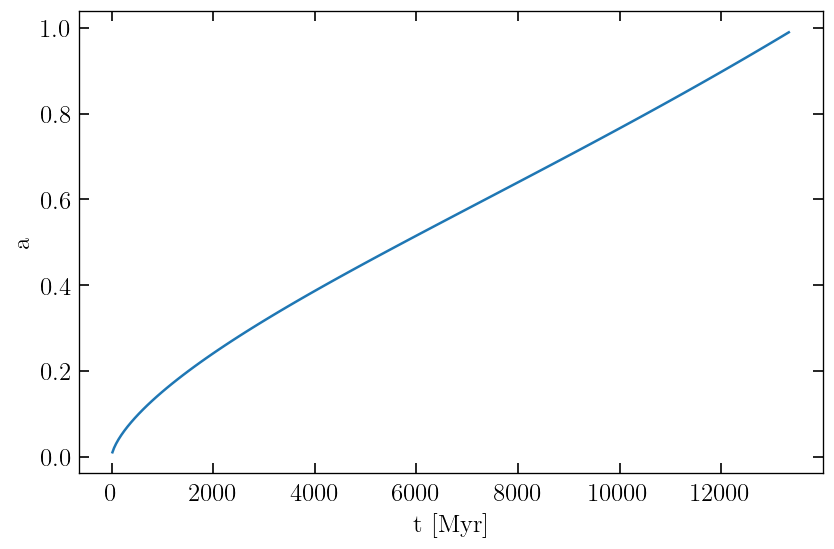

In [8]:
plt.plot(t_l, a1_l)
plt.xlabel("t [Myr]")
plt.ylabel("a")
plt.legend()

### z(t)

In [9]:
def a2z(a, a0=1):
    return a0 / a - 1 

In [10]:
z1_l = a2z(a1_l)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


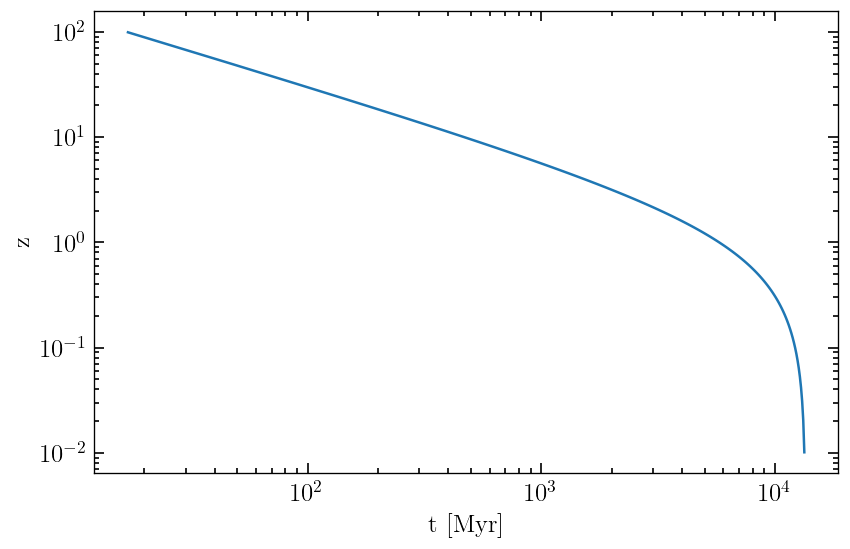

In [11]:
plt.plot(t_l, z1_l)
plt.xlabel("t [Myr]")
plt.ylabel("z")
plt.yscale('log')
plt.xscale("log")
plt.legend()

## Hubble sphere

$$E(a) = \sqrt{ \Omega_R \left(\frac{a}{a_0}\right)^{-4} + \Omega_M \left(\frac{a}{a_0}\right)^{-3} + \Omega_\Lambda + \Omega_K \left(\frac{a}{a_0}\right)^{-2} }$$

In [12]:
def Ha(a, H0, a0, OmR, OmM, OmL, OmK):
    'give me H0 in /Myr (/s), return Ha in /Myr (/s)'
    Ea = np.sqrt(OmR /a**4 + OmM / a**3 + OmL + OmK / a**2)
    return H0 * Ea

In [13]:
H0 = 70 #km/s/Mpc

In [14]:
c = 3e5 #km/s

In [15]:
chi = c/(a1_l * Ha(a1_l, H0, a0, OmR, OmM, OmL, OmK)) #Mpc

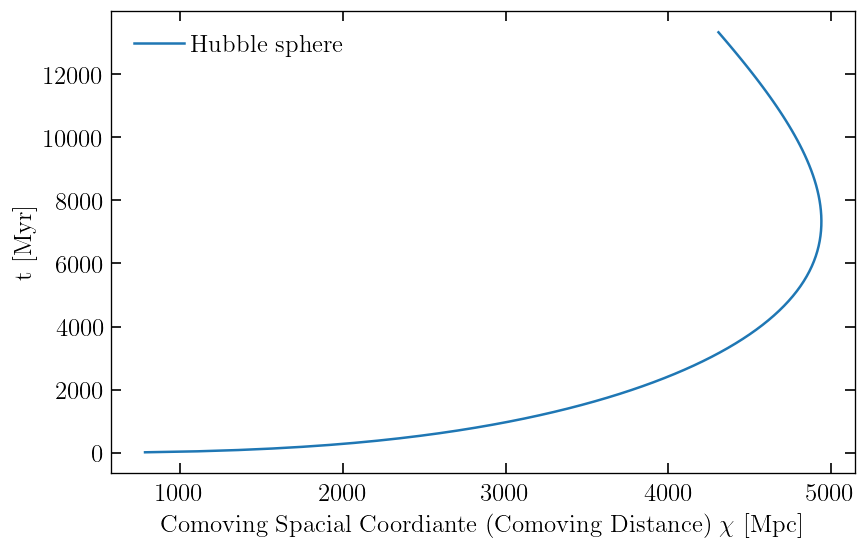

In [22]:
plt.plot(chi, t_l, label="Hubble sphere")
plt.xlabel("Comoving Spacial Coordiante (Comoving Distance) $\chi$ [Mpc]")
plt.ylabel("t [Myr]")
# plt.yscale('log')
# plt.xscale("log")
plt.legend()